In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("final_startup_dataset_v4.csv")
df.head()

,name,category_list,funding_total_usd,country_code,state_code,founded_at,funding_rounds,first_funding_at,last_funding_at,status_binary
0,1 mainstream,"['Apps', 'Cable', 'Distribution', 'Software']",5000000.0,USA,CA,2012-03-01,1,2015-03-17,2015-03-17,1
1,1000 markets,"['Art', 'E-Commerce', 'Marketplaces']",500000.0,USA,WA,2009-01-01,1,2009-05-15,2009-05-15,1
2,1000memories,['Curated Web'],2535000.0,USA,CA,2010-07-01,2,2010-01-01,2011-02-16,1
3,100plus,['Analytics'],1250000.0,USA,CA,2011-09-16,2,2011-11-02,2011-11-30,1
4,1010data,['Software'],35000000.0,USA,NY,2000-01-01,1,2010-03-08,2010-03-08,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12267 entries, 0 to 12266
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               12267 non-null  object 
 1   category_list      12267 non-null  object 
 2   funding_total_usd  12262 non-null  float64
 3   country_code       12267 non-null  object 
 4   state_code         12267 non-null  object 
 5   founded_at         12267 non-null  object 
 6   funding_rounds     12267 non-null  int64  
 7   first_funding_at   12267 non-null  object 
 8   last_funding_at    12267 non-null  object 
 9   status_binary      12267 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 958.5+ KB


In [4]:
df.isna().sum()

name                 0
category_list        0
funding_total_usd    5
country_code         0
state_code           0
founded_at           0
funding_rounds       0
first_funding_at     0
last_funding_at      0
status_binary        0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

name                 0
category_list        0
funding_total_usd    0
country_code         0
state_code           0
founded_at           0
funding_rounds       0
first_funding_at     0
last_funding_at      0
status_binary        0
dtype: int64

In [7]:
df.shape

(12262, 10)

In [8]:
import ast
df["category_list"] = df["category_list"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
categories = df["category_list"].explode()
category_counts = categories.value_counts()
categories_to_keep = category_counts[category_counts >= 200].index.tolist()
for category in categories_to_keep:
    df[category] = df["category_list"].apply(lambda x: 1 if category in x else 0)
df.drop(columns=["category_list"], inplace=True)

In [9]:
df.head()

,name,funding_total_usd,country_code,state_code,founded_at,funding_rounds,first_funding_at,last_funding_at,status_binary,Software,...,Security,Clean Technology,Semiconductors,Apps,Health and Wellness,SaaS,Web Hosting,Video,Networking,Social Network Media
0,1 mainstream,5000000.0,USA,CA,2012-03-01,1,2015-03-17,2015-03-17,1,1,...,0,0,0,1,0,0,0,0,0,0
1,1000 markets,500000.0,USA,WA,2009-01-01,1,2009-05-15,2009-05-15,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1000memories,2535000.0,USA,CA,2010-07-01,2,2010-01-01,2011-02-16,1,0,...,0,0,0,0,0,0,0,0,0,0
3,100plus,1250000.0,USA,CA,2011-09-16,2,2011-11-02,2011-11-30,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1010data,35000000.0,USA,NY,2000-01-01,1,2010-03-08,2010-03-08,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.shape

(12262, 35)

In [11]:
df['Software'].value_counts()

Software
0    10376
1     1886
Name: count, dtype: int64

In [12]:
df['Games'].value_counts()

Games
0    11733
1      529
Name: count, dtype: int64

In [13]:
import pandas as pd

# Convert columns to datetime with the specific format 'DD-MM-YYYY'
df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors='coerce')

# Calculate the age at first funding (difference between first funding date and founding date)
df['age_at_first_funding'] = (df['first_funding_at'] - df['founded_at']).dt.days // 365

# Calculate the age at last funding (difference between last funding date and founding date)
df['age_at_last_funding'] = (df['last_funding_at'] - df['founded_at']).dt.days // 365

df.head()


,name,funding_total_usd,country_code,state_code,founded_at,funding_rounds,first_funding_at,last_funding_at,status_binary,Software,...,Semiconductors,Apps,Health and Wellness,SaaS,Web Hosting,Video,Networking,Social Network Media,age_at_first_funding,age_at_last_funding
0,1 mainstream,5000000.0,USA,CA,2012-03-01,1,2015-03-17,2015-03-17,1,1,...,0,1,0,0,0,0,0,0,3,3
1,1000 markets,500000.0,USA,WA,2009-01-01,1,2009-05-15,2009-05-15,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1000memories,2535000.0,USA,CA,2010-07-01,2,2010-01-01,2011-02-16,1,0,...,0,0,0,0,0,0,0,0,-1,0
3,100plus,1250000.0,USA,CA,2011-09-16,2,2011-11-02,2011-11-30,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1010data,35000000.0,USA,NY,2000-01-01,1,2010-03-08,2010-03-08,1,1,...,0,0,0,0,0,0,0,0,10,10


In [14]:
df.shape

(12262, 37)

In [15]:
df[df["age_at_first_funding"] < 0].shape[0]

735

In [16]:
df[df["age_at_last_funding"] < 0].shape[0]

396

In [17]:
df = df[df["age_at_first_funding"] >= 0]
df = df[df["age_at_first_funding"] >= 0]

In [18]:
df.shape

(11527, 37)

In [19]:
#df.to_csv("final_startup_dataset_v3.csv", index=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11527 entries, 0 to 12266
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  11527 non-null  object        
 1   funding_total_usd     11527 non-null  float64       
 2   country_code          11527 non-null  object        
 3   state_code            11527 non-null  object        
 4   founded_at            11527 non-null  datetime64[ns]
 5   funding_rounds        11527 non-null  int64         
 6   first_funding_at      11527 non-null  datetime64[ns]
 7   last_funding_at       11527 non-null  datetime64[ns]
 8   status_binary         11527 non-null  int64         
 9   Software              11527 non-null  int64         
 10  Biotechnology         11527 non-null  int64         
 11  Mobile                11527 non-null  int64         
 12  Curated Web           11527 non-null  int64         
 13  E-Commerce           

In [21]:
df.drop(columns=["founded_at", "first_funding_at", "last_funding_at"], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11527 entries, 0 to 12266
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  11527 non-null  object 
 1   funding_total_usd     11527 non-null  float64
 2   country_code          11527 non-null  object 
 3   state_code            11527 non-null  object 
 4   funding_rounds        11527 non-null  int64  
 5   status_binary         11527 non-null  int64  
 6   Software              11527 non-null  int64  
 7   Biotechnology         11527 non-null  int64  
 8   Mobile                11527 non-null  int64  
 9   Curated Web           11527 non-null  int64  
 10  E-Commerce            11527 non-null  int64  
 11  Social Media          11527 non-null  int64  
 12  Advertising           11527 non-null  int64  
 13  Enterprise Software   11527 non-null  int64  
 14  Games                 11527 non-null  int64  
 15  Health Care           11

In [23]:
dash_count = (df['funding_total_usd'] == '-').sum()
print(dash_count)

0


In [24]:
from sklearn.preprocessing import LabelEncoder
df = df.drop(columns=['name', "state_code"], axis=1)
df['funding_total_usd'] = df['funding_total_usd'].astype(float)


country_encoders = {}
state_encoders = {}
le_country = LabelEncoder()
df['country_code'] = le_country.fit_transform(df['country_code'])
country_encoders['country_code'] = le_country

In [25]:
print("Country Code Encoding:")
for original, encoded in zip(le_country.classes_, le_country.transform(le_country.classes_)):
    print(f"{original} -> {encoded}")

Country Code Encoding:
ARE -> 0
ARG -> 1
AUS -> 2
AUT -> 3
BEL -> 4
BGR -> 5
BLM -> 6
BLR -> 7
BMU -> 8
BRA -> 9
CAN -> 10
CHE -> 11
CHL -> 12
CHN -> 13
COL -> 14
CRI -> 15
CZE -> 16
DEU -> 17
DNK -> 18
ESP -> 19
EST -> 20
FIN -> 21
FRA -> 22
GBR -> 23
GHA -> 24
GRC -> 25
GTM -> 26
HKG -> 27
HUN -> 28
IDN -> 29
IND -> 30
IRL -> 31
ISL -> 32
ISR -> 33
ITA -> 34
JOR -> 35
JPN -> 36
KOR -> 37
LBN -> 38
LIE -> 39
LTU -> 40
LUX -> 41
LVA -> 42
MAF -> 43
MEX -> 44
MYS -> 45
NGA -> 46
NLD -> 47
NOR -> 48
NZL -> 49
PAK -> 50
PER -> 51
PHL -> 52
POL -> 53
PRI -> 54
PRT -> 55
ROM -> 56
RUS -> 57
SAU -> 58
SGP -> 59
SLV -> 60
SOM -> 61
SVK -> 62
SVN -> 63
SWE -> 64
THA -> 65
TUR -> 66
TWN -> 67
UGA -> 68
UKR -> 69
URY -> 70
USA -> 71
VNM -> 72
ZAF -> 73


In [25]:
df['status_binary'].value_counts()

status_binary
1    6668
0    4859
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11527 entries, 0 to 12266
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funding_total_usd     11527 non-null  float64
 1   country_code          11527 non-null  int32  
 2   funding_rounds        11527 non-null  int64  
 3   status_binary         11527 non-null  int64  
 4   Software              11527 non-null  int64  
 5   Biotechnology         11527 non-null  int64  
 6   Mobile                11527 non-null  int64  
 7   Curated Web           11527 non-null  int64  
 8   E-Commerce            11527 non-null  int64  
 9   Social Media          11527 non-null  int64  
 10  Advertising           11527 non-null  int64  
 11  Enterprise Software   11527 non-null  int64  
 12  Games                 11527 non-null  int64  
 13  Health Care           11527 non-null  int64  
 14  Services              11527 non-null  int64  
 15  Internet              11

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["status_binary"]), df["status_binary"], test_size=0.2, random_state=42, stratify=df["status_binary"])

Accuracy of Random Forest model (test): 0.72
Accuracy of Random Forest model (train): 0.76
Precision of Random Forest model (test): 0.73
Recall of Random Forest model (test): 0.82
F1 Score of Random Forest model (test): 0.77
Confusion Matrix (Test Set):
[[ 574  398]
 [ 242 1092]]


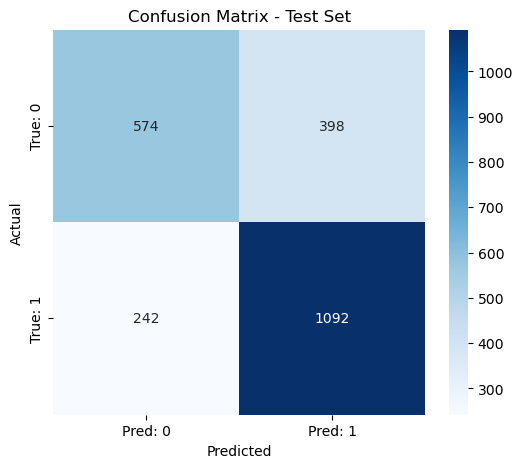

['random_forest_model.pkl']

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import joblib

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = rf_model.predict(X_test)

# Evaluate the model performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy of Random Forest model (test): {accuracy_test:.2f}")

# Predict on the training set
y_pred_train = rf_model.predict(X_train)

# Evaluate the model performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy of Random Forest model (train): {accuracy_train:.2f}")

# Calculate precision, recall, and F1 score on the test set
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print(f"Precision of Random Forest model (test): {precision_test:.2f}")
print(f"Recall of Random Forest model (test): {recall_test:.2f}")
print(f"F1 Score of Random Forest model (test): {f1_test:.2f}")


# Calculate confusion matrix on the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

# You can also plot the confusion matrix for better visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Test Set')
plt.show()

joblib.dump(rf_model, 'random_forest_model.pkl')

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Train the model using the training data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = dt_model.predict(X_test)

# Evaluate the model performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy of Decision Tree model (test): {accuracy_test:.2f}")

# Predict on the training set
y_pred_train = dt_model.predict(X_train)

# Evaluate the model performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy of Decision Tree model (train): {accuracy_train:.2f}")

# Calculate precision, recall, and F1 score on the test set
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print(f"Precision of Random Forest model (test): {precision_test:.2f}")
print(f"Recall of Random Forest model (test): {recall_test:.2f}")
print(f"F1 Score of Random Forest model (test): {f1_test:.2f}")

Accuracy of Decision Tree model (test): 0.69
Accuracy of Decision Tree model (train): 0.79
Precision of Random Forest model (test): 0.72
Recall of Random Forest model (test): 0.78
F1 Score of Random Forest model (test): 0.75


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9221 entries, 7285 to 1203
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funding_total_usd     9221 non-null   float64
 1   country_code          9221 non-null   int32  
 2   funding_rounds        9221 non-null   int64  
 3   Software              9221 non-null   int64  
 4   Biotechnology         9221 non-null   int64  
 5   Mobile                9221 non-null   int64  
 6   Curated Web           9221 non-null   int64  
 7   E-Commerce            9221 non-null   int64  
 8   Social Media          9221 non-null   int64  
 9   Advertising           9221 non-null   int64  
 10  Enterprise Software   9221 non-null   int64  
 11  Games                 9221 non-null   int64  
 12  Health Care           9221 non-null   int64  
 13  Services              9221 non-null   int64  
 14  Internet              9221 non-null   int64  
 15  Technology            9

In [31]:
X_train.isna().sum()

funding_total_usd       0
country_code            0
funding_rounds          0
Software                0
Biotechnology           0
Mobile                  0
Curated Web             0
E-Commerce              0
Social Media            0
Advertising             0
Enterprise Software     0
Games                   0
Health Care             0
Services                0
Internet                0
Technology              0
Finance                 0
Analytics               0
Hardware + Software     0
Security                0
Clean Technology        0
Semiconductors          0
Apps                    0
Health and Wellness     0
SaaS                    0
Web Hosting             0
Video                   0
Networking              0
Social Network Media    0
age_at_first_funding    0
age_at_last_funding     0
dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 5. Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train_scaled, y_train)

# 7. Make predictions on the test set
y_pred_test = knn_model.predict(X_test_scaled)

# 8. Evaluate the model performance
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy of KNN model (test): {accuracy_test:.2f}")

# 9. Make predictions on the training set
y_pred_train = knn_model.predict(X_train_scaled)

#10. Evaluate the model performance on the training set.
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy of KNN model (train): {accuracy_train:.2f}")

# Calculate precision, recall, and F1 score on the test set
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print(f"Precision of Random Forest model (test): {precision_test:.2f}")
print(f"Recall of Random Forest model (test): {recall_test:.2f}")
print(f"F1 Score of Random Forest model (test): {f1_test:.2f}")

Accuracy of KNN model (test): 0.66
Accuracy of KNN model (train): 0.77
Precision of Random Forest model (test): 0.71
Recall of Random Forest model (test): 0.71
F1 Score of Random Forest model (test): 0.71


In [33]:
from sklearn.naive_bayes import GaussianNB

# 11. Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# 12. Make predictions on the test set
y_pred_test = nb_model.predict(X_test_scaled)

# 13. Evaluate model performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of Naive Bayes model (test): {accuracy_test:.2f}")

# 14. Make predictions on the training set
y_pred_train = nb_model.predict(X_train_scaled)

# 15. Evaluate model performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy of Naive Bayes model (train): {accuracy_train:.2f}")

# 16. Calculate precision, recall, and F1 score on the test set
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print(f"Precision of Naive Bayes model (test): {precision_test:.2f}")
print(f"Recall of Naive Bayes model (test): {recall_test:.2f}")
print(f"F1 Score of Naive Bayes model (test): {f1_test:.2f}")

Accuracy of Naive Bayes model (test): 0.61
Accuracy of Naive Bayes model (train): 0.60
Precision of Naive Bayes model (test): 0.77
Recall of Naive Bayes model (test): 0.45
F1 Score of Naive Bayes model (test): 0.57


In [34]:
from xgboost import XGBClassifier

# 17. Create and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 18. Make predictions on the test set
y_pred_test = xgb_model.predict(X_test_scaled)

# 19. Evaluate model performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of XGBoost model (test): {accuracy_test:.2f}")

# 20. Make predictions on the training set
y_pred_train = xgb_model.predict(X_train_scaled)

# 21. Evaluate model performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy of XGBoost model (train): {accuracy_train:.2f}")

# 22. Calculate precision, recall, and F1 score on the test set
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print(f"Precision of XGBoost model (test): {precision_test:.2f}")
print(f"Recall of XGBoost model (test): {recall_test:.2f}")
print(f"F1 Score of XGBoost model (test): {f1_test:.2f}")

Accuracy of XGBoost model (test): 0.72
Accuracy of XGBoost model (train): 0.83
Precision of XGBoost model (test): 0.74
Recall of XGBoost model (test): 0.80
F1 Score of XGBoost model (test): 0.77


c:\Users\ishaa\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:56:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
